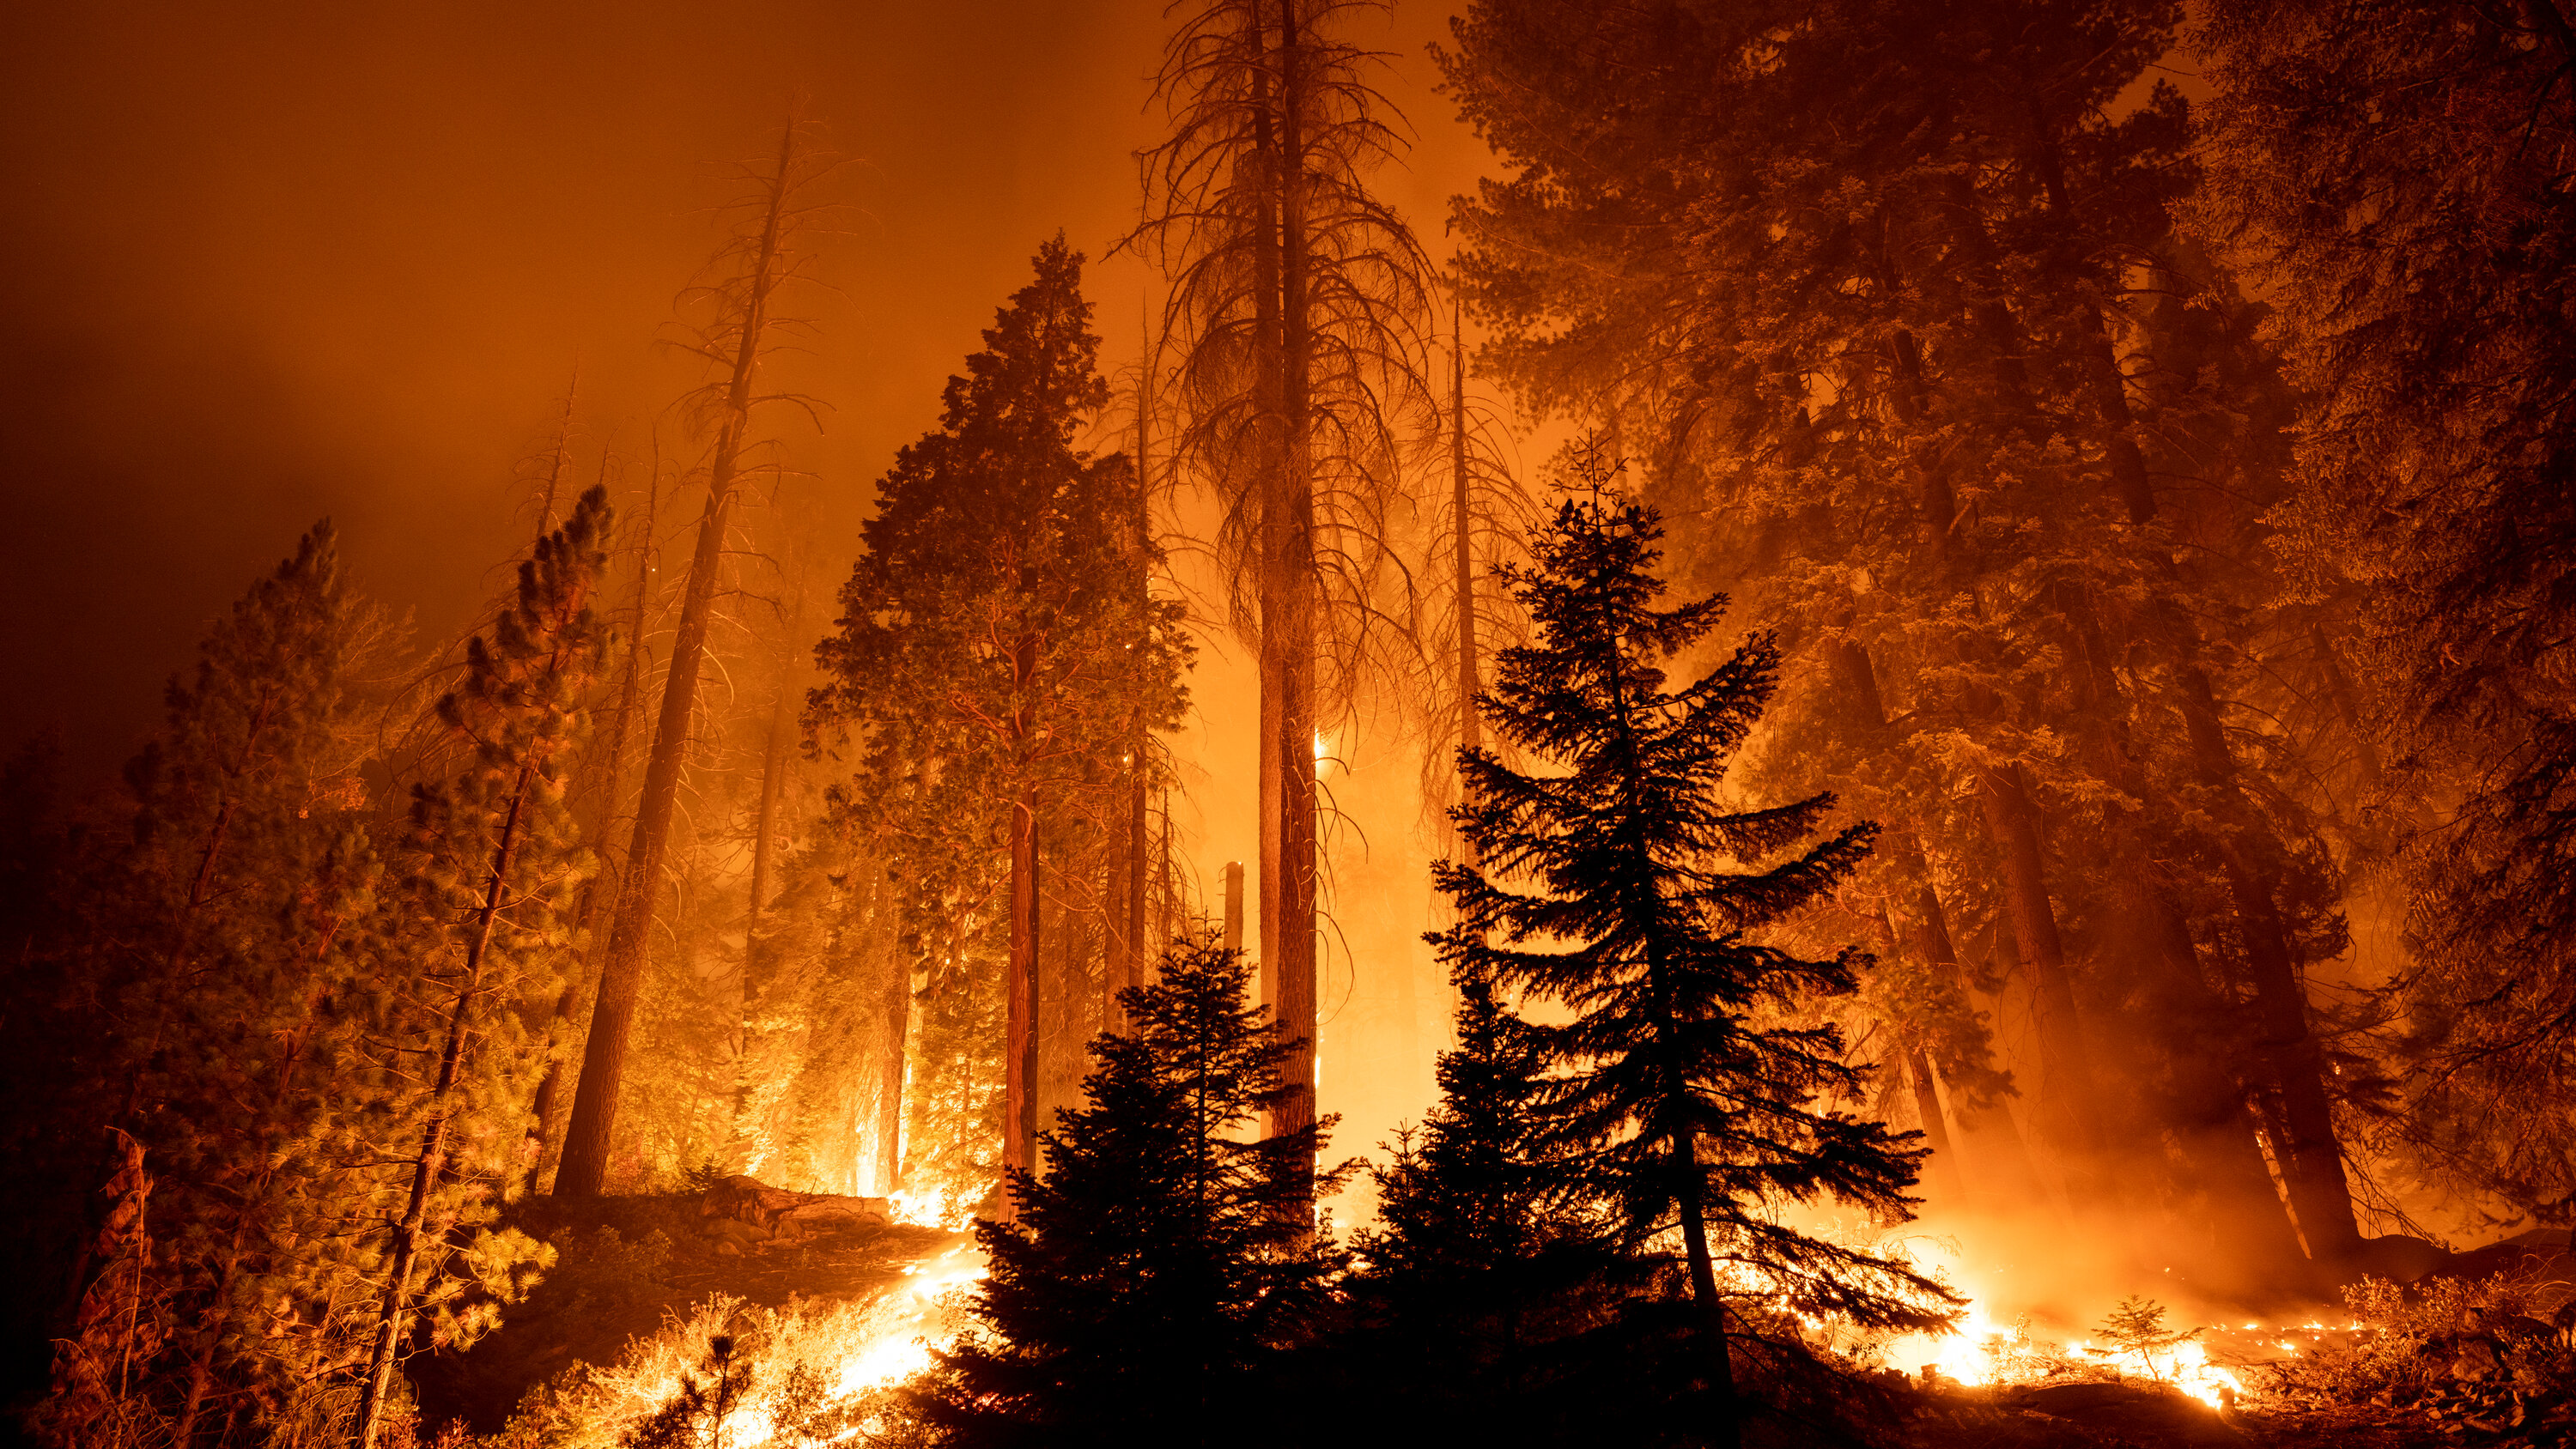

In Canada every year, over 12 million calls are made to 911 (https://www.theglobeandmail.com/technology/canadas-9-1-1-emergency/article560927/). What if some of these calls are occurring at the same time, where there are not enough emergency personnel to respond to all of them at once? How to tell which calls are more urgent than others? What if there are some ways that victims could tweet something and the emergency response can occur right away based on text analysis of the tweet?

Also by the end of 2021, total of 8835 wild fires were recorded in California, alone (https://en.wikipedia.org/wiki/2021_California_wildfires). People have very little time to evacuate and save themselves from fire. What would be the fastest way to reach these victims and evacuate them from the site?

We think Natural Language Process (NLP) can help with identfying emergency response situations from non-emergency situations.

The dataset is from the Kaggle competition. We are predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0 (https://www.kaggle.com/competitions/nlp-getting-started/data).


###Table of Contents
1. Setting Up
2. Data Analysis
3. Model Analysis

*   3.1. Setup() without custom_stopwords
*   3.2. Setup() with custom_stopwords 

4. Conclusion

##1. Setting **up**

In this section, we are installing all requirments and downloading the dataset from Kaggle website. We have two sets of data, which are training_data and test_data. 

Tweets in the data needs to be pre-processed to transform the raw text into a format that machine learning algorithms can learn from. 

In [ ]:
! pip install pycaret
! pip install pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set_theme()
! pip install Kaggle
! mkdir ~/.kaggle

In [ ]:
!pip install -U pip setuptools wheel
!pip install spacy
!python -m spacy download en_core_web_sm

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c nlp-getting-started --force
! unzip nlp-getting-started.zip
training_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
training_data.shape

(7613, 5)

In [ ]:
test_data.shape

(3263, 4)

Text pre-processing of our dataset can be done simply by using setup() function of pycaret. The following pre-processing are done automatically:

1. Removing numeric characters
2. Removing special charactiers
3. Word Tokenization
4. Stopword Removal
5. Bigram Extraction
6. Trigram Extraction
7. Lemmatizing

After setting up, you see that there are total 7613 tweets that have been processed and it created 10175 vocabularies from pre-processing

##2. Data **Analysis**

For our assignment, we will be using data from Kaggle Competition (https://www.kaggle.com/competitions/nlp-getting-started/data?select=train.csv). The training dataset contains 7613 samples. Short description of features are below:

- **id:** numeric value assigned to each row of samples
- **keyword:** one word that could describe the tweet 
- **location:** physical location where the tweet originated
- **text:** Tweet made by people
- **target:** status of disaster (1-disaster, 0-not disater)



##3. Model **Analysis**

###3.1. SetUp() without using custom_stopwords



Custom stopwords are the words that occur in very high frequency in the tweets. As such, this is adding more noise than information. Deciding a list of `custom_stopwords` is a subjective decision and mostly stems from your understanding of the dataset. 

For example, in this dataset, words like 'fire', 'evacuate', 'died', 'flood' etc. are very obvious, since we are working on a dataset with disaster tweets.

In the section 3.1., we will setup our pycaret environment without using the stopwords, and compare the performance of the model when we use stopwords in the section 3.2.

In [ ]:
from pycaret.nlp import *
#setup without using custom stopwords
exp_nlp101 = setup(data = training_data, target ='text', session_id = 123)

Description,Value
session_id,123
Documents,7613
Vocab Size,10175
Custom Stopwords,False


INFO:logs:setup() succesfully completed......................................


We are going to create a topic model from our dataset. There are 5 topic models for NLP supported by pycaret:
1. Latent Dirichlet Allocation (lda)
2. Latent Semantic Indexing (lsi)
3. Hierarchical Dirichlet Process (hdp)
4. Random Projectsion (rp)
5. Non-Negative Matrix Factorization (nmf)

In [ ]:
lda = create_model(model='lda', num_topics = 6, multi_core=True)
print(lda)

INFO:logs:LdaModel(num_terms=10175, num_topics=6, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


LdaModel(num_terms=10175, num_topics=6, decay=0.5, chunksize=100)


Now that we have created a topic model, we would like to assign the topic proportions to our dataset to analyze the results. We will achieve this by using `assign_model()` function.

In [ ]:
lda_results = assign_model(lda)
lda_results.head()

INFO:logs:(7613, 13)
INFO:logs:assign_model() succesfully completed......................................


,id,keyword,location,text,target,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Dominant_Topic,Perc_Dominant_Topic
0,1,NaN,NaN,reason earthquake may forgive,1,0.033388,0.033371,0.033393,0.833181,0.033333,0.033333,Topic 3,0.83
1,4,NaN,NaN,forest fire,1,0.055556,0.055556,0.055556,0.055556,0.722222,0.055556,Topic 4,0.72
2,5,NaN,NaN,resident ask shelter place notify officer evac...,1,0.013889,0.014010,0.014131,0.013909,0.014057,0.930004,Topic 5,0.93
3,6,NaN,NaN,people receive wildfire evacuation order,1,0.027839,0.027807,0.027868,0.207441,0.681048,0.027996,Topic 4,0.68
4,7,NaN,NaN,get send smoke wildfire pour school,1,0.023895,0.440662,0.023810,0.023810,0.227542,0.260281,Topic 1,0.44


Now we have 6 additional columns are now added to the dataframe. 'text' column is the text after all pre-processing. 

Topic_0 ... Topic_5 are the topic proportions and represents the distribution of topics for each document. 

Dominant_Topic is the topic number with highest proportion and Perc_Dominant_Topic is the percentage of dominant topic over 1

In [ ]:
plot_model()

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=None, plot=frequency, topic_num=None, save=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: frequency
INFO:logs:Rendering Visual
INFO:logs:Fitting CountVectorizer()


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

###3.2. SetUp() using custom_stopwords

In this section, we will use custom stopwords that will occur frequently in our tweets. Topic Modeling is very iterative machine learning task, finding the right list of custom stopwords is only possible after several iterations.

In [ ]:
exp_nlp102 = setup(data = training_data, target = 'text', session_id = 456,
                   custom_stopwords = ['fire', 'died', 'disaster', 'afraid', 'flood', 'evacuate', 'earthquake', 'shot', 
                                       'horrible', 'victim','killed', 'deadly', 'accident', 'damage', 'vandalize', 'ablaze',
                                       'ambulance', 'crashes', 'hospital', 'annihilated'],
                   log_experiment = True, experiment_name = 'disastertweets')

Description,Value
session_id,456
Documents,7613
Vocab Size,10142
Custom Stopwords,True


INFO:logs:setup() succesfully completed......................................


In [ ]:
lda = create_model('lda')

INFO:logs:LdaModel(num_terms=10142, num_topics=4, decay=0.5, chunksize=100)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
plot_model(lda, plot = 'topic_distribution')

INFO:logs:Initializing plot_model()
INFO:logs:plot_model(model=LdaModel(num_terms=10142, num_topics=4, decay=0.5, chunksize=100), plot=topic_distribution, topic_num=None, save=False, system=True)
INFO:logs:Topic selected. topic_num : Topic 0
INFO:logs:Checking exceptions
INFO:logs:Importing libraries


INFO:logs:save_param set to False
INFO:logs:plot type: topic_distribution
INFO:logs:SubProcess assign_model() called ==================================
INFO:logs:Initializing assign_model()
INFO:logs:assign_model(model=LdaModel(num_terms=10142, num_topics=4, decay=0.5, chunksize=100), verbose=False)
INFO:logs:Determining model type
INFO:logs:model type: lda
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:(7613, 11)
INFO:logs:assign_model() succesfully completed......................................
INFO:logs:SubProcess assign_model() end ==================================
INFO:logs:Sorting Dataframe
INFO:logs:Rendering Visual


INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


It is important to identify if a trained model is objectively good or bad, as well have an ability to compare different models/methods. To do so, we require an objective measure for the quality. The approaches that are commonly used today as follows:

- **Eye Balling Models :** Look at Top N words, Topics / Documents etc. 
- **Intrinsic Evaluation Metrics:** Interpretability and semantics of model, suchas topic coherence
- **Extrinsic Evaluation Metrics:** Is model good at performing predefined tasks, such as classification
- **Human Judgements:** Does the topic model improves your understanding of the problem?


In this section, we will evaluate **coherence value of our topic model** using `tune_model()` function. Followed by extrinsic evaluation on number of topics in a topic model to optimize classifier that can predict whether *a tweet* is about a disaster or not using `status` column in the dataset.

**Topic Coherence** measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference. 

In the simplest term, the model with highest coherence score is the best model based on intrinsic evaluation criteria. 

In [17]:
tuned_unsupervised = tune_model(model = 'lda', multi_core = True)

INFO:logs:LdaModel(num_terms=10142, num_topics=32, decay=0.5, chunksize=100)
INFO:logs:tune_model() succesfully completed......................................


Best Model: Latent Dirichlet Allocation | # Topics: 32 | Coherence: 0.5767


For our lda model, the `Accuracy` is optimized when `num_topics` are set to `32`. 

In [ ]:
tuned_classification = tune_model(model = 'lda', multi_core = True, supervised_target = 'target')

INFO:logs:Initializing tune_model()
INFO:logs:tune_model(model=lda, multi_core=True, supervised_target=target, estimator=None, optimize=None, custom_grid=None, auto_fe=True, fold=10, verbose=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


IntProgress(value=0, description='Processing: ', max=25)

Output()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,16:21:58
Status,. . . . . . . . . . . . . . . . . .,Creating Topic Model
Step,. . . . . . . . . . . . . . . . . .,Fitting Model With 32 Topics


INFO:logs:Importing libraries


INFO:logs:Objective : Classification
INFO:logs:Defining model name
INFO:logs:Topic Model Name: Latent Dirichlet Allocation
INFO:logs:Defining supervised estimator
INFO:logs:Estimator: lr
INFO:logs:Defining Optimizer
INFO:logs:Optimize: Accuracy
INFO:logs:Problem : Supervised
INFO:logs:auto_fe param set to True
INFO:logs:Extracting Polarity
INFO:logs:Extracting Subjectivity
INFO:logs:Extracting Wordcount
INFO:logs:Defining Tuning Grid
INFO:logs:Pre-defined Grid used
INFO:logs:Fitting Model with num_topics = 2
INFO:logs:SubProcess create_model() called ==================================
INFO:logs:Initializing create_model()
INFO:logs:create_model(model=lda, multi_core=True, num_topics=2, verbose=False, system=True)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor
INFO:logs:Defining topic model
INFO:logs:Model: Latent Dirichlet Allocation
INFO:logs:Defining num_topics parameter
INFO:logs:num_topics set to: 2
INFO:logs:LDA multi_core enabled


In [ ]:
save_model(lda,'Final LDA Model 07Nov2022')

In [ ]:
saved_lda = load_model('Final LDA Model 07Nov2022')
print(saved_lda)